In [1]:
import numpy as np
import cupy as cp
import cupyx.scipy.signal as signal
import scipy
import pandas as pd

import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objs as go
from plotly.subplots import make_subplots

from astropy.modeling import models, fitting
import astropy.units as u
from astropy import constants as const
from astropy.stats import gaussian_sigma_to_fwhm,gaussian_fwhm_to_sigma

import datetime
import pickle
import importlib
import json
import time
import glob

from time_converter import time_converter
from data.eve_const import wavelength_full,line_name,line_window,initial_guess
from gaussian_fit_eve import gaussian_fit_eve


In [2]:
band_index=0
with open('./data/fit_10s/fit_10s_'+line_name[band_index]+'.pkl', 'rb') as file:
        fit_df=pickle.load(file)

    
para_err=fit_df.apply(lambda x: np.sqrt(np.diag(x['pcov'])),axis=1)
para=fit_df[['amplitude','mean','stddev']].apply(lambda row: np.array(row), axis=1)

# create a df with para,para_err,time
para_df=pd.DataFrame({'para':para,'para_err':para_err,'time':fit_df['time']})
para_df=para_df.set_index('time')

In [18]:
para_df.__len__()

12678120

In [34]:
para_df=c

In [30]:
para_df=para_df[:2678120]

In [35]:
# plot the fitting error of the 3 parameters
fig,axs=plt.subplots(3,1,figsize=(10,8),sharex=True,)
# axs[0].scatter(para_df['time'],np.stack(para_df['para'].values)[:, 0],marker='x',label='amplitude')
axs[0].scatter(para_df.index,np.stack(para_df['para_err'].values)[:, 0],s=0.3,marker='x',label='amplitude_err')
axs[0].set_ylabel('amplitude fit error')

upper_percentile=np.nanpercentile(np.stack(para_df['para_err'].values)[:, 0],99.9)
axs[0].set_ylim(0,4*upper_percentile)

# axs[1].scatter(para_df['time'],np.stack(para_df['para'].values)[:, 1],marker='x',label='mean')
axs[1].scatter(para_df.index,np.stack(para_df['para_err'].values)[:, 1],s=0.3,marker='x',label='mean_err')
axs[1].set_ylabel('mean fit error')

upper_percentile=np.nanpercentile(np.stack(para_df['para_err'].values)[:, 1],99)
axs[1].set_ylim(0,3*upper_percentile)


# axs[2].scatter(para_df['time'],np.stack(para_df['para'].values)[:, 2],marker='x',label='stddev')
axs[2].scatter(para_df.index,np.stack(para_df['para_err'].values)[:, 2],s=0.3,marker='x',label='stddev_err')
axs[2].set_ylabel('stddev fit error')

upper_percentile=np.nanpercentile(np.stack(para_df['para_err'].values)[:, 2],99)
axs[2].set_ylim(0,3*upper_percentile)

axs[2].set_xlabel('Date')
axs[0].set_title('EVE '+line_name[band_index]+': Gaussian Fit Error')
axs[0].set_xlim(para_df.index[0],para_df.index[-1])
plt.tight_layout()
plt.savefig('output/cadence_10s/fitting_error/fit_err_'+line_name[band_index]+'.png')
# close the figure
plt.close(fig)

(array([ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0., 82.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.]),
 array([0.0e+00, 1.0e-12, 2.0e-12, 3.0e-12, 4.0e-12, 5.0e-12, 6.0e-12,
        7.0e-12, 8.0e-12, 9.0e-12, 1.0e-11, 1.1e-11, 1.2e-11, 1.3e-11,
        1.4e-11, 1.5e-11, 1.6e-11, 1.7e-11, 1.8e-11, 1.9e-11, 2.0e-11,
        2.1e-11, 2.2e-11, 2.3e-11, 2.4e-11, 2.5e-11, 2.6e-11, 2.7e-11,
        2.8e-11, 2.9e-11, 3.0e-11, 3.1e-11, 3.2e-11, 3.3e-11, 3.4e-11,
        3.5e-11, 3.6e-11, 3.7e-11, 3.8e-11, 3.9e-11, 4.0e-11, 4.1e-11,
        

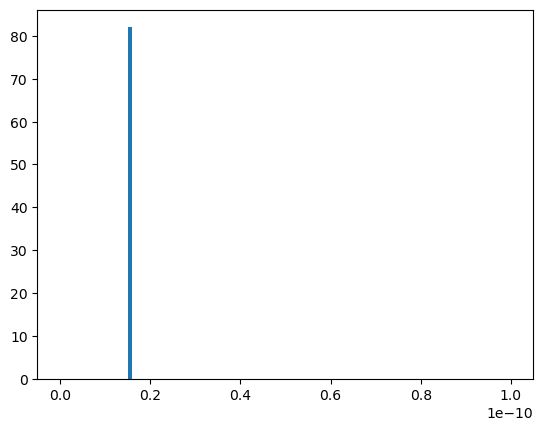

In [8]:
# plot a histogram of np.stack(para_df['para_err'].values)[:, 2]
a=np.stack(para_df['para_err'].values)[:, 2]
a=a[np.isfinite(a)]
fig,ax=plt.subplots()
ax.hist(a,bins=100,range=(0,1e-10))

(array([9.100000e+01, 4.600000e+01, 3.400000e+01, 4.200000e+01,
        3.300000e+01, 2.700000e+01, 2.500000e+01, 3.300000e+01,
        2.500000e+01, 2.400000e+01, 2.100000e+01, 2.100000e+01,
        2.400000e+01, 2.500000e+01, 2.300000e+01, 2.600000e+01,
        2.500000e+01, 2.300000e+01, 2.900000e+01, 2.900000e+01,
        2.000000e+01, 2.700000e+01, 2.500000e+01, 3.400000e+01,
        3.900000e+01, 2.200000e+01, 5.300000e+01, 7.600000e+01,
        2.340000e+02, 1.610000e+03, 9.767000e+03, 4.263800e+04,
        1.307150e+05, 2.851130e+05, 4.516140e+05, 5.370320e+05,
        5.038020e+05, 4.193170e+05, 3.732420e+05, 4.021010e+05,
        4.923690e+05, 6.120170e+05, 7.410390e+05, 8.702490e+05,
        9.697130e+05, 1.004425e+06, 9.675370e+05, 8.820160e+05,
        7.665280e+05, 6.341390e+05, 4.889690e+05, 3.404160e+05,
        2.133480e+05, 1.179810e+05, 5.747400e+04, 2.479100e+04,
        9.285000e+03, 3.348000e+03, 1.227000e+03, 6.310000e+02,
        4.210000e+02, 3.240000e+02, 2.45

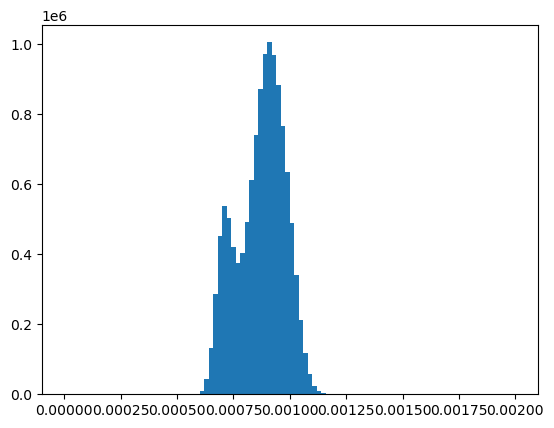

In [13]:
a=np.stack(para_df['para_err'].values)[:, 1]
a=a[np.isfinite(a)]
fig,ax=plt.subplots()
ax.hist(a,bins=100,range=(0,2e-3))

In [10]:
a

array([0.00075072, 0.00073955, 0.00073565, ..., 0.00091243, 0.00095476,
       0.00090223])

In [15]:
a.size

12396828

In [16]:
np.log10(a.size)

7.09331057561999